In [88]:
# Hamish Johnson
# Jan 18, 2024

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import hamhelper.plotting as hp
import hamhelper.colours as hc

data_path = "data\CoffeeCounter.csv"

C:\Users\hamis\AppData\Local\Temp\ipykernel_1064\3035619589.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x /num_weeks:.1f}' for x in y_vals])


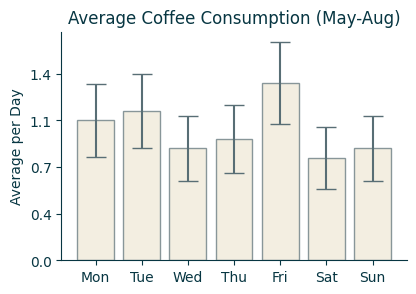

In [106]:
data = np.genfromtxt(data_path, delimiter = ',')
data = data[np.where(data/1000 <= 1693555200)]  # Before sept
datetimes = np.array([datetime.fromtimestamp(_/1000) for _ in data])

# Get weekday for each datetime
num_weeks = (max(datetimes) - min(datetimes)).days // 7 + 1
day_of_week = [dt.weekday() for dt in datetimes]

with plt.rc_context({'axes.edgecolor':'#073642', 'xtick.color':'#073642', 'ytick.color':'#073642', 'figure.facecolor':'white'}):
    # Temporary rc parameters in effect
    fig, ax = plt.subplots(figsize = np.array([3.3, 2.2])*1.35 )

    n, b, _ = ax.hist(day_of_week, bins=np.arange(8)-0.5, rwidth=0.8, color='#eee8d5', alpha=0.7, edgecolor='#586e75')

    # Set x-axis labels
    plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    # Plot stems for standard deviation
    ax.errorbar(range(7), n, yerr = np.sqrt(n), color = '#586e75', markersize=8, label='Mean ± Std Deviation',  capsize = 7, linestyle = 'none')

    # Set plot labels and title
    # plt.xlabel('Day of the Week', color = "#073642")
    plt.ylabel('Average per Day', color = "#073642")
    plt.title('Average Coffee Consumption (May-Aug)', color = "#073642")

    # Rescale y axis
    y_vals = ax.get_yticks()
    ax.set_yticklabels([f'{x /num_weeks:.1f}' for x in y_vals])
    hp.despine()
    for spine in ax.spines.values():
        spine.set_edgecolor('#073642')

    plt.savefig('plots/A1_personalDataVisualization_coffee.png', dpi = 300, bbox_inches = 'tight')
    plt.show()

